__Finding time series for categories categories:__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

In [2]:
drct = '/home/somayeh/Documents/Career/Data_Incubator/Project/'

filename3 = 'uspatentcitation.tsv'

In [3]:
filename = drct+'group_id_patent_list'
with open(filename, 'rb') as f:
    group_id_patent_list = pickle.load(f)

def slicedict(d, s):
    return {k:v for k,v in d.items() if k.startswith(s)}
#TECHNOLOGIES OR APPLICATIONS FOR MITIGATION OR ADAPTATION AGAINST CLIMATE CHANGE
Y02_group = slicedict(group_id_patent_list, 'Y02')  

In [4]:
# h04_group_patent_ids =  []
# for key in H04_group.keys():
#     h04_group_patent_ids.append(H04_group[key])
    
# h04_group_patent_ids = [item for items in h04_group_patent_ids for item in items]

In [5]:
list(Y02_group.keys())

['Y02B', 'Y02A', 'Y02W', 'Y02P', 'Y02E', 'Y02T', 'Y02C', 'Y02D']

In [6]:
Y1 = Y02_group[list(Y02_group.keys())[7]]

In [7]:
df_chunk = pd.read_csv(drct+filename3,sep='\t',header=0, chunksize=1000000)
patent_list3 = []  
for cnt, chunk in enumerate(df_chunk):
    print(cnt)    
    chunk.drop(['patent_id','citation_id','uuid', 'name', 'kind','country','category','sequence'], axis=1)
    chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
    patent_list3.append(chunk['year'])
    
year_all = pd.concat(patent_list3)
del patent_list3    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87


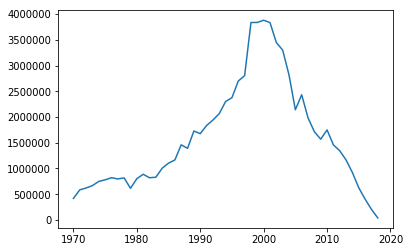

In [8]:
YY = np.histogram(year_all[(year_all<2020)&(year_all>=1970)],49)
plt.plot(YY[1][:-1],YY[0])

In [9]:
def citation_list(filename, Y1):
    df_chunk = pd.read_csv(filename,sep='\t',header=0, chunksize=1000000)
    patent_list3 = []  
    for cnt, chunk in enumerate(df_chunk):
#         print(cnt)
        chunk.drop(['uuid', 'name', 'kind','country','category','sequence'], axis=1)
        chunk['year'] = pd.to_datetime(chunk['date'], format = '%Y-%M-%d', errors='coerce').dt.year
        chunk = chunk[(chunk.year>=1970)] 
        chunk = chunk.loc[chunk['citation_id'].str.isnumeric()]
        chunk['citation_id'] = chunk['citation_id'].astype(int)
        chunk = chunk.loc[pd.to_numeric(chunk['citation_id']).isin(Y1)]
        patent_list3.append(chunk[['citation_id','year']])
    df3 = pd.concat(patent_list3)
    del patent_list3
    return(df3)

In [10]:
citation_hist = {}
for hkey in Y02_group.keys():
    print(hkey)
    Y1 = Y02_group[hkey]
    df = citation_list(drct+filename3, Y1)
    yrs = df.year
    h = np.histogram(yrs[(yrs<2020)&(yrs>=1970)],49)
    citation_hist[hkey] = h[0]
    del (df ,yrs)
    

Y02B
Y02A
Y02W
Y02P
Y02E
Y02T
Y02C
Y02D


In [11]:
import pickle
with open(drct+'citation_hist_Y02', 'wb') as f:
    pickle.dump((citation_hist, YY), f)

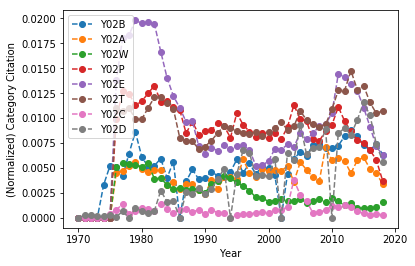

In [17]:
for hkey in citation_hist.keys():
    Y1 = citation_hist[hkey]
#     if len(H04_group[hkey])>50000:
    h = np.divide(Y1,YY[0])
    plt.plot(YY[1][:-1],h, 'o--', label=hkey)
    plt.xlabel('Year')
    plt.ylabel('(Normalized) Category Citation')
    plt.legend( )
plt.show()



In [18]:
citation_hist.keys()

dict_keys(['Y02B', 'Y02A', 'Y02W', 'Y02P', 'Y02E', 'Y02T', 'Y02C', 'Y02D'])

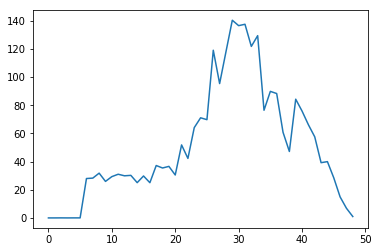

In [19]:
plt.plot(citation_hist['Y02A']/citation_hist['Y02A'][-1])

In [20]:
for hkey in citation_hist.keys():
    print(citation_hist[hkey])

[    1     2     6     3  2483  4076  4169  3330  5270  5300  4929  4553
  4288  4936  4039  6225     0  5329  6762  6683  6701  8488  8181  8513
 10651 13912 12214 15404 16717 20123 19599 16407     0 14696 16624 14173
 15040 14586 12722 10926 12269 10563 11000 10231  7512  4584  2734  1528
   247]
[    3     3     7     3     6     6  3720  3760  4229  3449  3899  4125
  3978  4020  3331  3961  3327  4948  4715  4867  4055  6893  5620  8526
  9452  9276 15829 12683 15683 18660 18150 18280 16190 17205 10165 11946
 11743  8084  6274 11208 10088  8798  7656  5217  5315  3790  1987   915
   133]
[   2    2    1    1    4    7 4157 4420 4440 3257 4110 4847 3222 3297
 3332 3202 3480 4109 4070 4834 4194 6234 7159 8585 9096 8450 8661 7674
 7889 7746 6348 6637 6567 5725 4851 4140 3640 3461 3210 2516 3481 2417
 1709 1694  940  591  396  220   61]
[    7     7     7     5    16    24  8164 10133 10172  6930  9363 11067
 10871  9680 11780 12294 12613 12408 13410 14424 14650 16077 18559 18994
 185

In [49]:
HH[0]

array([ 418176,  584023,  620502,  667016,  748860,  779166,  820613,
        796782,  816382,  614377,  801220,  886924,  819772,  829839,
       1005030, 1103388, 1165439, 1459650, 1391214, 1727934, 1676337,
       1834249, 1941293, 2066094, 2301124, 2375922, 2699840, 2803533,
       3836949, 3838055, 3881078, 3836052, 3447488, 3301252, 2817622,
       2141061, 2432725, 1983267, 1714522, 1569289, 1749472, 1458154,
       1344022, 1164706,  920318,  624812,  403907,  205508,   38934])